
**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2021**

---

# Trabajo práctico entregable - Parte 2

In [1]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn
import statistics

seaborn.set_context('talk')

## Lectura del dataset

En la notebook 00 se explican los detalles de la siguiente sección.

In [2]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

In [3]:
df[:3]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,...,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,...,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,...,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN


In [4]:
df[['profile_gender', 'salary_monthly_NETO']].groupby('profile_gender').describe()

salary_monthly_NETO                                     \
                             count          mean            std   min   
profile_gender                                                          
Hombre                      4944.0  98836.063558  102159.664237   1.0   
Mujer                        908.0  73501.414465   56256.880181   2.0   
Otros                         31.0  95441.354839   88635.674358  40.0   

                                                       
                    25%      50%       75%        max  
profile_gender                                         
Hombre          53285.0  80000.0  110000.0  2080000.0  
Mujer           43818.0  65000.0   92000.0   800000.0  
Otros           39500.0  74000.0  117500.0   380000.0

In [5]:
df[df.salary_monthly_NETO > 1000]\
  [['profile_gender', 'salary_monthly_NETO']].groupby('profile_gender').describe()

salary_monthly_NETO                                         \
                             count           mean            std      min   
profile_gender                                                              
Hombre                      4815.0  101481.624343  102215.304684   1100.0   
Mujer                        863.0   77328.913778   55082.760570   2000.0   
Otros                         28.0  105660.714286   87235.710235  34000.0   

                                                       
                    25%      50%       75%        max  
profile_gender                                         
Hombre          55000.0  80000.0  110000.0  2080000.0  
Mujer           47850.0  67200.0   93000.0   800000.0  
Otros           43750.0  78900.0  122750.0   380000.0

In [6]:
# Nivel de Confianza empleado 95%, para todos los análisis que se realizan
alpha = 0.05

In [7]:
is_man = df.profile_gender == 'Hombre'

muestra_hombre = df[(df.salary_monthly_NETO > 1000) & is_man]
muestra_no_hombre = df[(df.salary_monthly_NETO > 1000) & ~is_man]

#Define dos datasets uno para Género Hombres con salario mensual >1000 (Group A)
# y uno para los demás individuos de otros géneros con salarios mensuales netos >1000 (Gruop B)
groupA = muestra_hombre.salary_monthly_NETO
groupB = muestra_no_hombre.salary_monthly_NETO


In [8]:
print (f"El número de valores NA en Group A es {groupA.isna().sum()}")
print (f"El número de valores NA en Group A es {groupB.isna().sum()}")

El número de valores NA en Group A es 0
El número de valores NA en Group A es 0


## Ejercicio 1: Estimación

**Consigna:**  Calcular una estimación puntual y un intervalo de confianza de nivel (1-alpha) para la resta entre la media del salario Neto para Hombres menos la media del salario Neto para otros géneros(diferencia de las medias entre el grupoA y grupoB). 
¿Cómo se relaciona este intervalo de confianza con el test de hipótesis?

La variable aleatoria para la que deseamos hacer la estimación es la diferencia de las medias muestrales de los salarios netos mensuales entre aquellos individuos del genero másculino ($A$) y de otros géneros ($B$), que denominaremos $\overline{X}_a - \overline{X}_b$.

Por las propiedades de la función Esperanza $E(X)$ la esperanza de la diferencia entre dos variables aleatorias es la diferencia de sus esperanzas marginales i.e. $E(\overline{X}_a - \overline{X}_b)=E(\overline{X}_a)-E(\overline{X}_b)$. 

El estimador puntual de $E(X)$ es la media muestral,
por lo que un estimador puntual para este caso es la diferencia de las medias muestrales:

In [9]:
diferencia_medias = statistics.mean(groupA) - statistics.mean(groupB)
print (f"La estimación puntual para la diferencia de medias de salario neto mensual para hombres vs otros géneros es {round(diferencia_medias, ndigits=2)} AR$")

La estimación puntual para la diferencia de medias de salario neto mensual para hombres vs otros géneros es 23262.37 AR$


Para la construcción de un intervalo de confianza debemos suponer una distribución para las variables aleatorias que estamos estudiando. El tamaño de las muestras $n_a$ y $n_b$ es suficientemente grande como para suponer una distribución para las medias muestrales.

Por el *Teorema Central del Límite*, independientemente de la distribución de las variables aleatorias de origen las medias muestrales $\overline{X}_a,\overline{X}_b$ ~ $N(\mu,\sigma)$. Para la diferencia de las medias muestrales es posible demostrar que:

$\overline{X}_a - \overline{X}_b$~ $N(\mu_a-\mu_b,\sigma_p^2)$

Cumpliendose que i) ambas muestras son independientes y ii) las distribuciones marginales de las medias muestrales como normales, para la construcción del intervalos de confianza podemos emplear el estadístico

 $T(n_p-1)=\frac{(\overline{X}_a - \overline{X}_b)-(\mu_a-\mu_b)}{\sqrt{\sigma_p^2/n_p}}$. 

 El intervalo de confianza tendrá la forma:

 $(\overline{X}_a - \overline{X}_b)\pm t(n_p-1,\alpha/2)*\sqrt{\sigma_p^2/n_p}$

La expresión para el estimador insesgado de la varianza poblacional $\sigma_p^2=V(\overline{X}_a - \overline{X}_b)$ depende de si podemos suponer varianzas iguales o diferentes. Igualmente la estimación del tamaño muestral ponderado $n_p$ depende de esta diferencia. 

Para analizar este supuesto se realiza el Test de Levene, bajo $H_0 \rightarrow \sigma_a^2 = \sigma_b^2$:



In [10]:
groupAVar = statistics.pvariance(groupA)
groupBVar = statistics.pvariance(groupB)

print (f"Group A Sample Var {round(numpy.sqrt(groupAVar), ndigits=2)}")
print (f"Group B Sample Var {round(numpy.sqrt(groupBVar), ndigits=2)}")

Group A Sample Var 102204.69
Group B Sample Var 56483.6


In [11]:
import scipy
alpha = 0.05
# H0 varianzas iguales
# H1 al menos una varianza es distinta
(_, pvalue) = scipy.stats.levene(groupA, groupB)
print (f"Se {'rechaza' if pvalue < alpha else 'Acepta'} H0 (Varianzas Iguales) para una significancia del 5% con pvalue = {round(pvalue, ndigits=7)} ")

Se rechaza H0 (Varianzas Iguales) para una significancia del 5% con pvalue = 1.3e-06 


Suponiendo no homogeneidad de varianzas obtenemos el intervalo de confianza para $\sigma_p^2, n_p$ como:

In [12]:
import statsmodels.stats.api as sms

cm = sms.CompareMeans(sms.DescrStatsW(groupA.values), sms.DescrStatsW(groupB.values))
cm.tconfint_diff(usevar='unequal')
li,ls = cm.tconfint_diff(usevar='unequal' , alpha = alpha )

print (f"Asumiendo varianzas distintas")
print (f"Diferencia medias muestrales: {round(diferencia_medias)} AR$")
print (f"Intervalo de confianza 95% (IC95): ({round(li)},{round(ls)}) AR$" )


Asumiendo varianzas distintas
Diferencia medias muestrales: 23262 AR$
Intervalo de confianza 95% (IC95): (18558,27967) AR$


## Ejercicio 2: Test de hipótesis



### 2.1 Formalización

Describir formalmente los distintos compenentes de un test de hipótesis para comprobar si la distribución de los salarios es distinta entre los grupos A y B.

**Hipótesis Nula**

$H_0 \rightarrow \mu_a - \mu_b = 0 $

**Estadístico (Pivote)**

$T(n_p-1)=\frac{(\overline{X}_a - \overline{X}_b)-(\mu_a-\mu_b)}{\sqrt{\sigma_p^2/n_p}}$

donde suponiendo heterocedasticidad (Test de Welch),

$\sigma_p^2 = \frac{\sigma_a^2}{n_a} + \frac{\sigma_b^2}{n_b}$

$n_p = \frac
{(\frac{\sigma_a^2}{n_a} + \frac{\sigma_b^2}{n_b})^2}
{
  \frac{(\sigma_a^2/n_a)^2}{n_a -1} +
  \frac{(\sigma_b^2/n_b)^2}{n_b -1}
  }$

 Definimos la zona de rechazo para una prueba bilateral tal que $H_0$ se acepta para 
  
  $t(\alpha/2,n_p-1)<T(n_p-1)<t(1-\alpha/2,n_p-1)$

con $\alpha=0.05$

### 2.2 P-valor

1. Calcule el p-valor y decida si rechazar o no la hipótesis nula.
2. Interprete el resultado.
3. Los dos grupos de nuestra muestra tienen tamaños muy distintos. ¿Esto afecta al tests?

Links útiles:
* [Test de hipótesis usando scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)
* [Test de Welch](http://daniellakens.blogspot.com/2015/01/always-use-welchs-t-test-instead-of.html)

In [13]:
(_,pvalue) = scipy.stats.ttest_ind(groupA, groupB , equal_var=False)

print (f"Según lo descrito aplicando el Test de Welch: pvalue = {pvalue}.\nTomando un nivel de significancia del 5% se {'rechaza' if pvalue < alpha else 'Acepta'} H0.")

Según lo descrito aplicando el Test de Welch: pvalue = 8.605197322133209e-22.
Tomando un nivel de significancia del 5% se rechaza H0.


La interpretación del resultado del Test de Welch puede resumirse en que con un nivel de confianza del 95% podemos suponer que la media poblacional de la diferencia de los salrios netos de los grupos analizados es diferente de cero. 

Sin embargo, atendiendo a las recomendaciones de la Sociedad Americana de Estadística[$^3$](https://amstat.tandfonline.com/doi/full/10.1080/00031305.2016.1154108#.Vt2XIOaE2MN) que indica que en casos de conclusiones que puedan dar forma a políticas socioeconómicas de alto alcance, como por ejemplo las políticas de género, es importante no basar las conclusiones en un único p-valor.

Para reforzar las conclusiones se realizó Test de Smirnov-Kolmogorov para dos muestras independientes, donde:

$H_0 \rightarrow F(X_a) = F(X_b)$

i.e. la distribuciones de probabilidad acumulada de las variables aleatorias $\overline{X}_a,\overline{X}_b$ son la misma función. 

Este test no paramétrico emplea el estadístico:

$D_n = sup|F(X_a) - F(X_b)|$

La distribución del estadístico $D$ es independiente de $F$. Definiendo la zona de rechazo como,

$P(D_n \sqrt{\frac{n_a+n_b}{n_an_b}}>K_\alpha)=\alpha$

Donde $K_\alpha$ es el valor crítico en la distribución de Kolmogorov, que define la zona de rechazo en una prueba unilateral izquierda. 

In [14]:
countA, bins_countA = numpy.histogram(groupA, bins=100)
countB, bins_countB = numpy.histogram(groupB, bins=100)

Graficamos los percentiles de la función de distribución acumulada (CDF) y los perncentiles de la función de densidad (PDF).


In [15]:
pdfA = countA / sum(countA)
pdfB = countB / sum(countB)

In [16]:
cdfA = numpy.cumsum(pdfA)
cdfB = numpy.cumsum(pdfB)

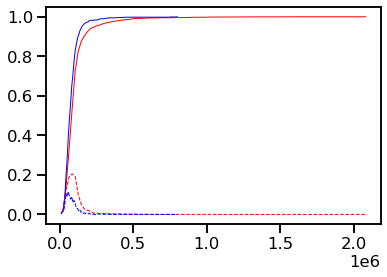

In [17]:
plt.plot(bins_countA[1:], cdfA, label="CDF" , color="red" , linewidth="1")
plt.plot(bins_countB[1:], cdfB, label="CDF" , color="blue" , linewidth="1")

plt.plot(bins_countA[1:], pdfA, color="red", label="PDF", linestyle="dashed" , linewidth="1")
plt.plot(bins_countB[1:], pdfB, color="blue", label="PDF", linestyle="dashed" , linewidth="1")

In [18]:
from scipy.stats import ks_2samp

In [19]:
(_ , pvalue) = ks_2samp(groupA, groupB)
print (f" Se  {'Rechaza' if pvalue < alpha else 'Acepta'} H0 (misma distribución) , pvalue = {pvalue} ")

 Se  Rechaza H0 (misma distribución) , pvalue = 1.5432100042289676e-14 


El resultado nos indica que aún sin hacer ninguna asunción respecto de las distribuciones de las variables originales, podemos afirmar que $X_a$ y $X_b$ provienen de distribuciones distintas.

Según nuestra estimación dicha diferencia se ubicaría entre $IC95: (LI,LS) = (18558,27967)AR$$ según los datos del año 2020 en Argentina.


### [Opcional] 2.3 Potencia del test

Nuestra muestra, ¿era lo suficientemente grande para detectar si existe o no una diferencia entre los grupos?

1. Utilice la función `tt_ind_solve_power` para calcular el tamaño necesario de la muestra para un poder estadístico de 0.8, 0.9 y 0.95, asumiendo una significancia estadística de 0.05.
2. ¿Cómo intepretan el poder estadístico de un test? Dado su conocimiento de dominio sobre los datos, ¿les parece que esta muestra es lo suficientemente grande para ser representativo de la tendencia general? ¿y para utilizarlo en un juicio penal contra una empresa XX por una causa de discriminación?

[Documentación](https://www.statsmodels.org/stable/generated/statsmodels.stats.power.tt_ind_solve_power.html)

NOTA: este análisis debería hacerse ANTES de recolectar los datos.

In [20]:
from statsmodels.stats.power import tt_ind_solve_power

In [21]:
effect_size = (groupA.mean() - groupB.mean()) / groupB.std()
# nobs1=None  - What we want to know
alpha = 0.05
ratio = len(groupB) / len(groupA)

In [22]:
 for x in range(80,100,5):
    result = tt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=x/100, ratio=ratio)
    print (f"Potencia {x}%, n = {round(result)}")

Potencia 80%, n = 298
Potencia 85%, n = 341
Potencia 90%, n = 399
Potencia 95%, n = 493


In [23]:
print (f"GroupB {len(groupB)} GroupA {len(groupA)} Ration {ratio}")

GroupB 891 GroupA 4815 Ration 0.18504672897196262


Si bien la muestra de individuos de género másculino es unas 5 veces más grande ambas muestras son suficientemente grandes para asegurar una potencia $\beta > 0.95$




## Ejercicio 3: Comunicación y visualización

# Ver archivo Entregable_Parte_2_Ejercicio_3.ipynb

**Consigna:** Seleccionen un resultado que les parezca relevante a partir de alguno de los ejercicios del entregable. Diseñe e implemente una comunicación en base a este mensaje, en un archivo PDF.

Elija las palabras y visualización más adecuada para que la comunicación sea entendible, efectiva y se dapte a UNA de las siguientes situaciones:

1. Una sección en un artículo de difusión a presentar como parte de una organización sin fines de lucro.
No más de 1 página A4 (o dos si los gráficos son muy grandes).
  1. Ejemplo: Alguna de las secciones [Los ecosistemas de emprendimiento de América Latina y el Caribe frente al COVID-19: Impactos, necesidades y recomendaciones](https://publications.iadb.org/es/los-ecosistemas-de-emprendimiento-de-america-latina-y-el-caribe-frente-al-covid-19-impactos-necesidades-y-recomendaciones), por ejemplo la sección *2.2. Reacciones de los emprendedores*.
  2. Ejemplo: Alguna de las secciones de [The state of gender pay gap in 2021](https://www.payscale.com/data/gender-pay-gap?tk=carousel-ps-rc-job)
  3. Puntos clave: 
    1. Simpleza de los gráficos.
    2. Comunicación en lenguaje simple a personas que no son necesariamente expertos de dominio.
    2. Selección de UNA oración sobre la que se hace énfasis.
    3. No es necesario que mencionen objetivos ni descripciones del conjunto de datos, se supone que eso ya estaría explicado en otras secciones del informe.

2. Una publicación científica o reporte técnico interno. No más de una página A4:
  2. Ejemplo: La sección de resultados de [IZA DP No. 12914: The Impact of a Minimum Wage Change on the Distribution of Wages and Household Income](https://www.iza.org/publications/dp/12914/the-impact-of-a-minimum-wage-change-on-the-distribution-of-wages-and-household-income).
  2. Ejemplo: Alguna de las secciones de [Temporary reduction in daily global CO2 emissions during the COVID-19 forced confinement](https://www.nature.com/articles/s41558-020-0797-x)
  3. Puntos clave:
    3. Nivel de detalle técnico requerido. Es necesario justificar la validez del análisis.
    4. La idea presentada puede ser más compleja. Pueden asumir que la audiencia tiene conocimiento técnico y va a analizar las visualizaciones en detalle. 
    5. Pueden presentar más en detalle las limitaciones del análisis (significancia estadística, etc.)
    2. No es necesario que mencionen objetivos ni descripciones del conjunto de datos, se supone que eso ya estaría explicado en otras secciones del informe.

3. Un tweet (o post de LinkedIn) para la cuenta de su empresa consultora que hace análisis de datos. El objetivo es promocionar un análisis de datos abiertos que van a incluir en su portfolio:
  1. Ejemplo: [Comparación vacunas covid](https://twitter.com/infobeautiful/status/1381577746527236098?s=20)
  2. Ejemplo: [Tweet del BID](https://twitter.com/el_BID/status/1388508583944507396?s=20). Lo valioso de este tweet es que usaron un único número para transmitir un mensaje. Puede ser algo así, o con un gráfico muy simple.
  3. Ejemplo: [Cambio climático](https://twitter.com/UNFCCC/status/1387732156190011394?s=20) Es un muy buen ejemplo, excepto que el gráfico no se lee nada y hay que entrar a la publicación original.
  3. Ejemplo: [¿Cuánto están los programadores en las empresas?](https://www.linkedin.com/posts/denis-rothman-0b034043_tech-career-work-activity-6793861923269054464-gS6y) (No verificamos la veracidad o seriedad de la fuente).
  4. Puntos clave:
    1. Su audiencia no va a mirar la visualización por más de unos segundos, y no tiene conocimiento técnico.
  3. Tienen que incluir además una *breve* descripción de cómo obtuvieron los datos que están presentando, que no entraría en el tweet.
